In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from scipy import ndimage

image = cv2.imread('sar_1(1).jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

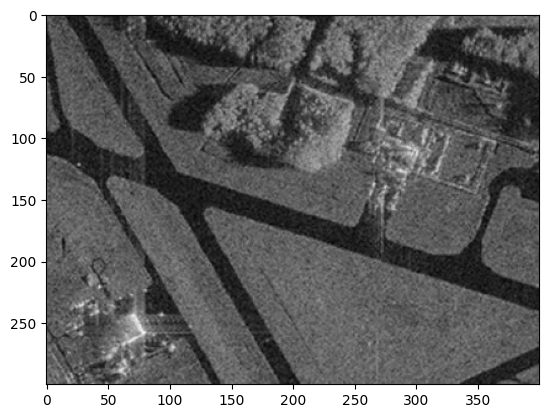

In [5]:
plt.imshow(image_gray, cmap="gray")

In [6]:
def homo_average(img, mask, point, T):
    # Вычисляем среднее значение в области, определяемой маской
    av_val = img[mask > 0].sum() / np.count_nonzero(mask)

    # Проверяем, находится ли значение пикселя в пределах T
    return abs(av_val - img[point]) <= T

def region_growing(image, seed_point, homo_fun, r, T):
    # Инициализация маски
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1  # Устанавливаем начальную точку в маске
    count = 1

    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        
        # Проходим по всем пикселям изображения
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                # Если пиксель не в маске и есть соседи в маске
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    # Проверяем однородность
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1  # Добавляем пиксель в локальную маску
        
        # Подсчитываем количество новых пикселей
        count = np.count_nonzero(local_mask)
        print(f"Количество новых пикселей: {count}")
        
        # Обновляем общую маску
        mask += local_mask

    return mask * 255  # Возвращаем маску в формате 0-255


In [7]:
seed_point = (250,250)
r = 4
T = 16
mask = region_growing(image_gray,seed_point,homo_average,r, T)

Количество новых пикселей: 56
Количество новых пикселей: 151
Количество новых пикселей: 242
Количество новых пикселей: 331
Количество новых пикселей: 415
Количество новых пикселей: 524
Количество новых пикселей: 613
Количество новых пикселей: 700
Количество новых пикселей: 788
Количество новых пикселей: 868
Количество новых пикселей: 974
Количество новых пикселей: 810
Количество новых пикселей: 777
Количество новых пикселей: 829
Количество новых пикселей: 879
Количество новых пикселей: 767
Количество новых пикселей: 753
Количество новых пикселей: 719
Количество новых пикселей: 676
Количество новых пикселей: 659
Количество новых пикселей: 651
Количество новых пикселей: 609
Количество новых пикселей: 562
Количество новых пикселей: 538
Количество новых пикселей: 497
Количество новых пикселей: 459
Количество новых пикселей: 450
Количество новых пикселей: 411
Количество новых пикселей: 373
Количество новых пикселей: 352
Количество новых пикселей: 305
Количество новых пикселей: 516
Количеств

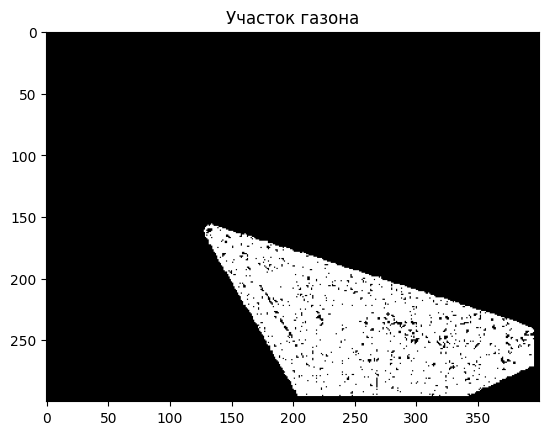

In [8]:
plt.imshow(mask, cmap = "gray")
plt.title("Участок газона")
plt.show()

In [9]:
flags = cv2.KMEANS_RANDOM_CENTERS
z = image_gray.reshape((-1,3))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

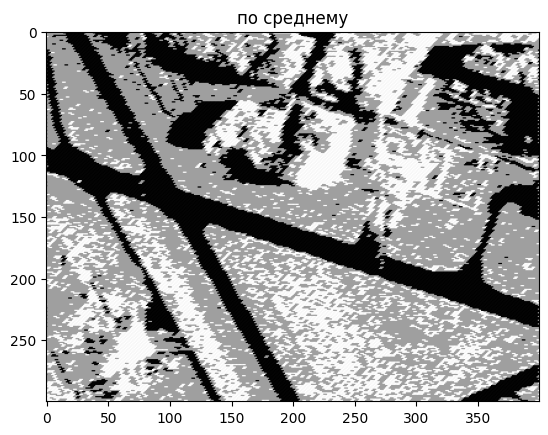

In [10]:
plt.imshow(res2, cmap="gray")
plt.title("по среднему")
plt.show()

In [23]:
def calculate_intracluster_distance(labels, centers, data):
    total_distance = 0
    
    # Проходим по каждому кластеру
    for i in range(len(centers)):
        # Извлекаем точки, принадлежащие текущему кластеру
        cluster_points = data[labels.flatten() == i]
        
        # Если в кластере есть точки
        if len(cluster_points) > 0:
            # Вычисляем расстояния от каждой точки к центру кластера
            distances = np.linalg.norm(cluster_points - centers[i], axis=1)
            # Суммируем расстояния для данного кластера
            total_distance += np.sum(distances)

    return total_distance


In [24]:
z = image_gray.reshape((-1, 1))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

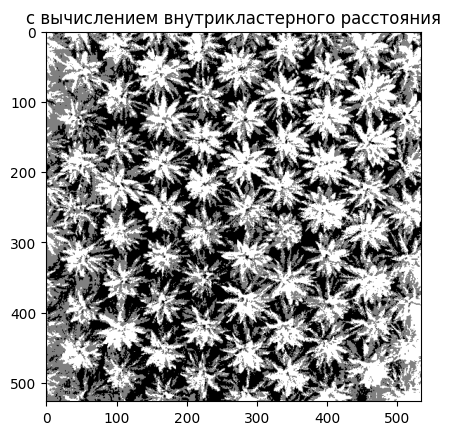

In [25]:
plt.imshow(res2, cmap="gray")
plt.title("с вычислением внутрикластерного расстояния")
plt.show()

In [26]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 15, 1.0)
K = 4
ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

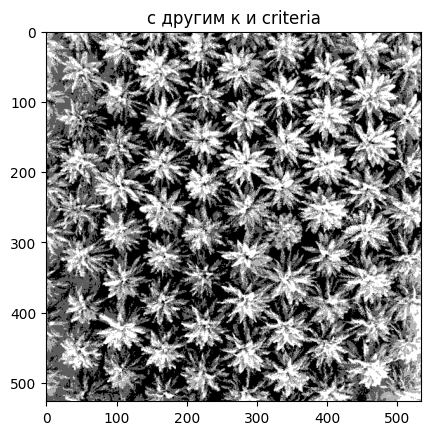

In [27]:
plt.imshow(res2, cmap="gray")
plt.title("с другим к и criteria")
plt.show()

In [28]:
image = cv2.imread("palm_1.JPG")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
blurred = cv2.GaussianBlur(image_gray, (13, 13), 0)
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
local_maxima = ndimage.maximum_filter(dist_transform, size=20, mode='constant')
ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
markers[dist_transform == local_maxima] = 1
markers = ndimage.label(markers)[0]
markers = cv2.watershed(image, markers.astype(np.int32))
num_trees = len(np.unique(markers)) - 1
segmented_image = image.copy()
segmented_image[markers == -1] = [255, 0, 0]

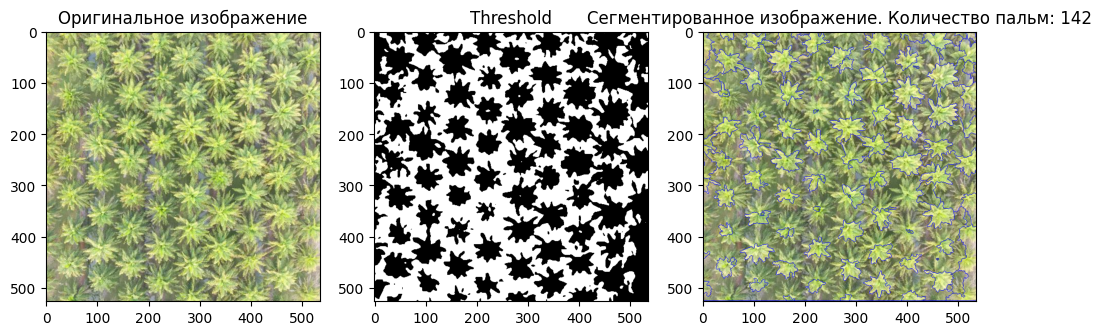

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригинальное изображение")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title("Threshold")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title(f"Сегментированное изображение. Количество пальм: {num_trees}")
plt.show()